#### Install all requirements for the project

In [194]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

#### Importing Libraries

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path
DOCS_PATH = 'docs/'
DATA_PATH = 'data/'

#### Importing our Datasets

In [196]:
commune_df = pd.read_excel((DATA_PATH + "commune.xlsx"))
enroll_df = pd.read_csv(DATA_PATH + "enroll.csv")
industry_df = pd.read_csv(DATA_PATH + "industry.csv")
ord_df = pd.read_csv(DATA_PATH + "ord.csv")
quest_df = pd.read_csv(DATA_PATH + "quest.csv")
studyd_df = pd.read_csv(DATA_PATH + "study_domain.csv")
tech_df = pd.read_csv(DATA_PATH + "technology.csv")
transaction_df = pd.read_csv(DATA_PATH + "transaction.csv")

# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project

>## Commune dataset

#### Display the Dataframe

In [446]:
commune_df.head(5)

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


#### Data overview

In [198]:
# Check the dimensions of the DataFrame
row, col = commune_df.shape
print("This datasset have",row,"rows","and",col,'columns')

This datasset have 140 rows and 5 columns


In [199]:
# Data Types
commune_df.dtypes

Commune_en     object
Commune_FR     object
Commune_Id     object
Departement    object
ADM1_PCODE     object
dtype: object

In [200]:
# Data info
commune_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Commune_en   140 non-null    object
 1   Commune_FR   140 non-null    object
 2   Commune_Id   140 non-null    object
 3   Departement  140 non-null    object
 4   ADM1_PCODE   140 non-null    object
dtypes: object(5)
memory usage: 5.6+ KB


In [201]:
# Describe the dataset
commune_df.describe()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
count,140,140,140,140,140
unique,140,140,140,10,10
top,Caracol,Saut d'Eau,HT0742,West,HT01
freq,1,1,1,20,20


#### Data cleaning

In [202]:
# Make sure our columns don't have duplicate values.
commune_df.duplicated().sum()

0

In [203]:
# Describe the dataset
commune_df.describe()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
count,140,140,140,140,140
unique,140,140,140,10,10
top,Caracol,Saut d'Eau,HT0742,West,HT01
freq,1,1,1,20,20


In [204]:
# dealing with missing data
commune_df.isna().sum()

Commune_en     0
Commune_FR     0
Commune_Id     0
Departement    0
ADM1_PCODE     0
dtype: int64

In [205]:
# Drop all columns we will not use in this dataset
to_drop = []
clean_commune_df = commune_df.drop(['Commune_FR'], axis = 1)

In [206]:
# display ou new dataframe
clean_commune_df.head(3)

,Commune_en,Commune_Id,Departement,ADM1_PCODE
0,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,HT0922,North-West,HT09


**Conclusion:** just checking that there's no missing and duplicated values in the commune dataset...

>## Enroll Dataset

#### Import Dataset

In [209]:
# Affiche done enroll yo
enroll_df.head(2)

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN


#### Data overview

In [210]:
enroll_df.shape

(148, 15)

#### Data cleaning

In [211]:
# Finding duplicated rows
print(enroll_df.duplicated().sum(),"Duplicated rows")

0 Duplicated rows


In [212]:
# Count how many missing values we have in this dataset
enroll_df.isnull().sum()

Unnamed: 0                0
created_at                0
expiry_date              88
user_id                   0
course_name               0
course_id                 0
percentage_completed      0
completed_at            148
expired                   0
is_free_trial             0
completed                 0
started_at               13
activated_at             71
updated_at                0
quest_id                 46
dtype: int64

In [213]:
# Total missing values we have
print("We have", enroll_df.isnull().sum().sum(), "missing values in this dataset")

We have 366 missing values in this dataset


In [214]:
# Dealing with our null values
clean_enroll_df = enroll_df.fillna(value = 0)
print("We now have", clean_enroll_df.isnull().sum().sum(), "missing value")

We now have 0 missing value


In [216]:
# Our cleaned Dataframe
clean_enroll_df.head(2)

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,0,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,0.0,False,True,False,0,0,2020-12-12T06:41:29.844Z,0
1,1,2020-12-13T14:41:17.720Z,0,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,0.0,False,True,False,0,0,2020-12-13T14:41:17.720Z,0


**Conclusion:** All the missing values in the Enroll dataset have been filled with 0 as new value.
Also we will be using our new dataframe called **clean_enroll_df**

>## Industry Dataset

In [217]:
# Affiche done industry yo
industry_df.head(3)

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item6,Technology (Software/ Internet),905e2608-ce95-11eb-809f-7c67a234f601
2,2,item5,Education,905e2608-ce95-11eb-809f-7c67a234f601


>## Ord Dataset

In [218]:
# Affiche done ord yo
ord_df.head(3)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601


#### Data overview

In [219]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               18 non-null     int64  
 1   created_at               18 non-null     object 
 2   user_id                  18 non-null     int64  
 3   product_name             18 non-null     object 
 4   product_id               18 non-null     int64  
 5   amount_dollars           18 non-null     int64  
 6   amount_cents             18 non-null     int64  
 7   subscription             18 non-null     bool   
 8   coupon_code              4 non-null      object 
 9   coupon_id                4 non-null      float64
 10  affiliate_referral_code  0 non-null      float64
 11  status                   18 non-null     object 
 12  quest_id                 14 non-null     object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 1.8+ KB


In [23]:
ord_df.shape

(18, 13)

In [220]:
ord_df.describe()

,Unnamed: 0,user_id,product_id,amount_dollars,amount_cents,coupon_id,affiliate_referral_code
count,18.000000,1.800000e+01,18.0,18.000000,18.000000,4.000000e+00,0.0
mean,8.500000,3.978105e+07,1100636.0,15.555556,1555.555556,6.535246e+06,NaN
std,5.338539,1.879479e+06,0.0,8.555853,855.585264,8.718553e+04,NaN
min,0.000000,3.485615e+07,1100636.0,0.000000,0.000000,6.452874e+06,NaN
25%,4.250000,3.989797e+07,1100636.0,20.000000,2000.000000,6.498275e+06,NaN
50%,8.500000,4.020500e+07,1100636.0,20.000000,2000.000000,6.514828e+06,NaN
75%,12.750000,4.038378e+07,1100636.0,20.000000,2000.000000,6.551799e+06,NaN
max,17.000000,4.158795e+07,1100636.0,20.000000,2000.000000,6.658457e+06,NaN


#### Data cleaning

In [79]:
# Duplicated rows
print(ord_df.duplicated().sum(), "Duplicated rows")

0 Duplicated rows


In [221]:
# Show how many missing values we have in this dataset
ord_df.isnull().sum()

Unnamed: 0                  0
created_at                  0
user_id                     0
product_name                0
product_id                  0
amount_dollars              0
amount_cents                0
subscription                0
coupon_code                14
coupon_id                  14
affiliate_referral_code    18
status                      0
quest_id                    4
dtype: int64

In [229]:
# Count all of our missing values
print(ord_df.isnull().sum().sum(), "Null values")

50 Null values


In [224]:
# Dealing with our missing values
clean_ord_df = ord_df.fillna(value=0)

In [230]:
print("Now we have", clean_ord_df.isnull().sum().sum(), "missing value Now")

Now we have 0 missing value Now


In [231]:
# Our new dataframe
clean_ord_df.head(3)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,0,0.0,0.0,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,0,0.0,0.0,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,0,0.0,0.0,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601


**Conclusion:** All the missing values in the Ord dataset have been filled with 0 as new value.
Also we will be using our new dataframe called **clean_ord_df**

>## Questions dataset

In [234]:
# Affiche done quest yo
quest_df.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


#### Data overview

In [235]:
quest_df.shape

(250, 17)

In [236]:
quest_df.describe()

,Unnamed: 0
count,250.000000
mean,124.500000
std,72.312977
min,0.000000
25%,62.250000
50%,124.500000
75%,186.750000
max,249.000000


In [237]:
quest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

#### Data cleaning

In [35]:
# Looking for duplicated rows
quest_df.duplicated().sum()

0

In [238]:
# Missing values
quest_df.isnull().sum()

Unnamed: 0            0
gender                0
dob                   6
commune               0
created_at            0
modified_at           0
department            1
education_level       0
university            0
study_domain          0
current_employed      0
formal_sector_job     0
have_computer_home    0
internet_at_home      0
hear_AA_1             0
after_AA              0
quest_id              0
dtype: int64

In [239]:
# Total missing values
print('We have',quest_df.isnull().sum().sum(),'missing values in our dataset')

We have 7 missing values in our dataset


In [240]:
# Dealing with our missing values
clean_quest_df = quest_df.fillna({'dob':'not specified', 'department':'no info'}).fillna(0)

In [243]:
print("Now all this dataframe is clean we have", clean_quest_df.isnull().sum().sum(), "missing value")

Now all this dataframe is clean we have 0 missing value


In [244]:
# Rename the column commune to Commune_Id
# I do this because i need this dataframe to be able to merge easily with the commune dataset
clean_quest_df = clean_quest_df.rename(columns={'commune':'Commune_Id'})

In [250]:
# Add all our "commune" values on uppercase to match with our commune ID
clean_quest_df["Commune_Id"] = clean_quest_df["Commune_Id"].str.upper()

In [252]:
# Display our clean dataframe
clean_quest_df.head(2)

,Unnamed: 0,gender,dob,Commune_Id,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,no info,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


>## Study domain Dataset

In [254]:
# Affiche done Study domain yo
studyd_df.head(2)

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601


In [255]:
studyd_df.isnull().sum().sum()

0

In [256]:
studyd_df.duplicated().sum()

0

>## Technology Dataset

In [49]:
# Affiche done technology yo
tech_df.head(3)

,Unnamed: 0,key,values,quest_id
0,0,item1,R,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item11,Excel,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,item2,Python,905e2608-ce95-11eb-809f-7c67a234f601


In [50]:
# Duplicated rows in our dataset
print(tech_df.duplicated().sum(),'Dupicated rows')

0 Dupicated rows


In [51]:
# Missing values
print(tech_df.isnull().sum().sum(),"Null values")

0 Null values


In [52]:
# Affiche done industry yo
transaction_df.head(3)

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160
2,2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613,4645070622


In [53]:
print(transaction_df.duplicated().sum(),'Duplicated rows')

0 Duplicated rows


In [54]:
print(transaction_df.isnull().sum().sum(),'Missing values')

0 Missing values


## Looking for the top three communes of the country that will be the most likely to expand its training centers.

In [443]:
# merge ou commune dataframe with our questions dataframe
# merge_location_df = pd.merge(clean_commune_df,clean_quest_df,on="Commune_Id")

In [444]:
# New Dataframe we are going to use
# location_df = merge_location_df[["Commune_en"]]
# location_df.head(5)

In [445]:
# Top three communes of the country that will be the most likely to expand its training centers.
location_df.value_counts().head(3)

Commune_en    
Delmas            71
Port-au-Prince    59
Petion-Ville      29
dtype: int64

#### 2. Data vizualisation

## Question 1. How many applications must be made to select 25% women for each on average

## Question 2. What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection

#### Data overview

In [431]:
# Verify all the communication channel based on our Question dataframe
communication_channels = clean_quest_df["hear_AA_1"]

In [437]:
communication_channels.shape

(250,)

In [434]:
communication_channels.value_counts().head(5)

Friend      67
WhatsApp    66
Facebook    40
ESIH        18
LinkedIn    15
Name: hear_AA_1, dtype: int64

#### Data visualization

**Conclusion:** Based on all communications the most effective communication channels are: Friend, Whatsapp, Facebook, ESIH, LinkedIn

## Question 3. What is the average number of university students who should participate in this program

## Question 4. What will be the average number of applications per week that we could have

## Question 5. How many weeks should we extend the application process to select 60 students per commune?

## Question 6. If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

> To reply to this question, First we are going to merge our commune dataframe with our question's dataframe and we are going to look in our new data frame to see where all our canditates located.

#### 2. Merge/join the dataframe

In [375]:
# Review our commun columns
clean_commune_df.columns

Index(['Commune_en', 'Commune_Id', 'Departement', 'ADM1_PCODE'], dtype='object')

In [374]:
# Review our questions columns
clean_quest_df.columns

Index(['Unnamed: 0', 'gender', 'dob', 'Commune_Id', 'created_at',
       'modified_at', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id'],
      dtype='object')

In [379]:
merge_df = pd.merge(clean_commune_df,clean_quest_df, on="Commune_Id")

In [415]:
new_df = merge_df[["Commune_en","Commune_Id","Departement","have_computer_home","internet_at_home"]]
new_df.head(3)

,Commune_en,Commune_Id,Departement,have_computer_home,internet_at_home
0,Aquin,HT0731,South,Yes,Yes
1,Cap-Haitien,HT0311,North,Yes,Yes
2,Cap-Haitien,HT0311,North,Yes,No


#### If all the bootcamp were online, who would be the best communes

In [417]:
# Display all students with a laptop, an internet connection, both at the same time
both_yes = new_df.loc[(new_df['have_computer_home'] == "Yes") & (new_df['internet_at_home'] == "Yes")]
both_yes.head()

,Commune_en,Commune_Id,Departement,have_computer_home,internet_at_home
0,Aquin,HT0731,South,Yes,Yes
1,Cap-Haitien,HT0311,North,Yes,Yes
4,Cap-Haitien,HT0311,North,Yes,Yes
5,Cap-Haitien,HT0311,North,Yes,Yes
6,Caracol,HT0434,North-East,Yes,Yes


In [426]:
best_communes_df = both_yes[['Commune_en','have_computer_home','internet_at_home']]

In [428]:
# Now let's check for the best communes
best_communes = best_communes_df.value_counts()
best_communes.head(5)

Commune_en      have_computer_home  internet_at_home
Delmas          Yes                 Yes                 58
Port-au-Prince  Yes                 Yes                 52
Petion-Ville    Yes                 Yes                 21
Carrefour       Yes                 Yes                 17
Tabarre         Yes                 Yes                  9
dtype: int64

**Conclusion:** If all the bootcamp were online, the best communes would be: **Delmas, Port-au-Prince, Petion-Ville, Carrefour, Tabarre.**

POV: Based on all Minimum technical and software requirements for online courses we have selected all our students with **Computer at home** and **Internet at home** and we look for their location to what communes would be the best if the bootcamp were online

#### Percentage of students would have a laptop, an internet connection, both at the same time

In [412]:
# Select specifie
percent_both = both_yes[["have_computer_home","internet_at_home"]]
percent_both.head(3)

,have_computer_home,internet_at_home
0,Yes,Yes
1,Yes,Yes
4,Yes,Yes


In [413]:
# Control the some for both
result_percent_both_yes = percent_both.value_counts()
result_percent_both_yes

have_computer_home  internet_at_home
Yes                 Yes                 202
dtype: int64

In [414]:
# Sum of total students
print("We have",result_percent_both_yes.sum(),"students with a laptop, and an internet connection")

We have 202 students with a laptop, and an internet connection


#### Data visualization

## Question 7. What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

In [345]:
# Let's check our questions dataframe to see what columns we are going to work on
clean_quest_df.head(3)

,Unnamed: 0,gender,dob,Commune_Id,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,no info,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601


In [347]:
# Let's make a new dataframe with only our needed columns
new_df_channels = clean_quest_df[["gender","hear_AA_1"]]

In [349]:
# Display our new DF
new_df_channels.head(2)

,gender,hear_AA_1
0,male,unknown
1,female,Friend


In [466]:
# Display only Females to see their most effective communication channels
only_females_df_channels = new_df_channels.loc[(new_df_channels["gender"] == "female")]
only_females_df_channels.head(3)

,gender,hear_AA_1
1,female,Friend
6,female,WhatsApp
7,female,WhatsApp


In [467]:
# Overview our new dataframe
row,col = only_females_df_channels.shape
print("We have", row, "Females")

We have 47 Females


In [494]:
# Now let's check for their most effective communication channels
final_channels = only_females_df_channels.value_counts()
final_channels

gender  hear_AA_1              
female  Friend                     11
        WhatsApp                    9
        Bootcamp Alumni             8
        Facebook                    6
        ESIH                        5
        Ayiti Analytics Website     4
        other                       2
        LinkedIn                    1
        Instagram                   1
dtype: int64

#### Data visualization

<AxesSubplot:xlabel='gender,hear_AA_1'>

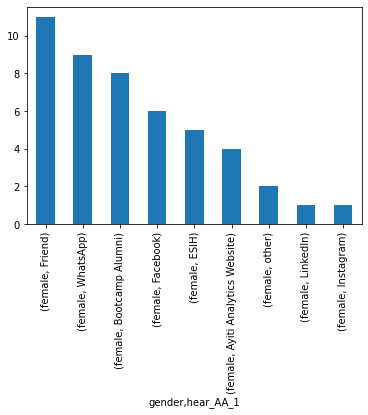

In [496]:
final_channels.plot(kind='bar')


**Conclusion:**  As we can see thier Top communication channels are Friends, Whatsapp, Bootcamp Alumni.